In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.8 MB/s eta 0:00:00


In [24]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found exist

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_recall_fscore_support
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
#from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler
from keras.layers import Dropout
from keras.regularizers import l2
import tensorflow_decision_forests as tfdf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
model_data_nn = pd.read_csv('/content/drive/MyDrive/CodeOp/model_data.csv')

In [ ]:
model_data_nn.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CA

In [5]:
model_data_nn['STATE'] = model_data_nn['STATE'].astype('category')
model_data_nn['STATE'] = model_data_nn['STATE'].cat.codes.astype(int) # Numerical values

model_data_nn['COUNTY_STATE'] = model_data_nn['COUNTY_STATE'].astype('category')
model_data_nn['COUNTY_STATE'] = model_data_nn['COUNTY_STATE'].cat.codes.astype(int) # Numerical values

model_data_nn = model_data_nn.drop(['NWCG_CAUSE_CLASSIFICATION = _Human', 'NWCG_CAUSE_CLASSIFICATION = _Natural', 'NWCG_CAUSE_CLASSIFICATION = _undetermined',
                                      'NWCG_CAUSE_AGE_CATEGORY = _Adult or Natural', 'NWCG_CAUSE_AGE_CATEGORY = _Minor'], axis=1)

model_data_nn['NWCG_GENERAL_CAUSE'] = model_data_nn['NWCG_GENERAL_CAUSE'].replace({'Other causes': 'Undetermined', 'Undetermined': 'Undetermined'})


In [ ]:
model_data_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682341 entries, 0 to 1682340
Data columns (total 37 columns):
 #   Column                                                         Non-Null Count    Dtype  
---  ------                                                         --------------    -----  
 0   FIRE_YEAR                                                      1682341 non-null  int64  
 1   NWCG_GENERAL_CAUSE                                             1682341 non-null  object 
 2   FIRE_SIZE                                                      1682341 non-null  float64
 3   DURATION                                                       1682341 non-null  float64
 4   STATE                                                          1682341 non-null  int64  
 5   PRECIPITATION                                                  1682341 non-null  float64
 6   TEMPERATURE                                                    1682341 non-null  float64
 7   WIND_SPEED                          

In [ ]:
model_data_nn['NWCG_GENERAL_CAUSE'].value_counts()

Undetermined                           461666
Debris and open burning                405877
Natural                                231547
Arson                                  219102
Equipment and vehicle use              141487
Recreation and ceremony                 69984
Misuse of fire by a minor               43018
Smoking                                 42540
Power supply                            29661
Railroad operations and maintenance     19660
Fireworks                               15376
Firearms and explosives use              2423
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [ ]:
# Separate features and target variable
X = model_data_nn.drop('NWCG_GENERAL_CAUSE', axis=1)
y = model_data_nn['NWCG_GENERAL_CAUSE']

In [ ]:
# convert to numpy arrays
X = np.array(X)

# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_y)

print(encoded_y)

print(dummy_y)

[ 7  6  1 ...  6  6 11]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=42)

# Standardize features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(12, activation='softmax'))
#model.sumary


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
37853/37853 [==============================] - 90s 2ms/step - loss: 2.3208 - accuracy: 0.3724 - val_loss: 1.7185 - val_accuracy: 0.4044
Epoch 2/50
37853/37853 [==============================] - 83s 2ms/step - loss: 1.6859 - accuracy: 0.4221 - val_loss: 1.6704 - val_accuracy: 0.4299
Epoch 3/50
37853/37853 [==============================] - 81s 2ms/step - loss: 1.6624 - accuracy: 0.4327 - val_loss: 1.6649 - val_accuracy: 0.4286
Epoch 4/50
37853/37853 [==============================] - 81s 2ms/step - loss: 1.6535 - accuracy: 0.4363 - val_loss: 1.6550 - val_accuracy: 0.4351
Epoch 5/50
37853/37853 [==============================] - 82s 2ms/step - loss: 1.6500 - accuracy: 0.4374 - val_loss: 1.6498 - val_accuracy: 0.4366
Epoch 6/50
37853/37853 [==============================] - 87s 2ms/step - loss: 1.6465 - accuracy: 0.4385 - val_loss: 1.6591 - val_accuracy: 0.4367
Epoch 7/50
37853/37853 [==============================] - 84s 2ms/step - loss: 1.6449 - accuracy: 0.4391 - val_loss: 1

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')

10515/10515 [==============================] - 18s 2ms/step - loss: 1.5875 - accuracy: 0.4602
Test Accuracy: 0.46022069454193115
Test Loss: 1.5875197649002075


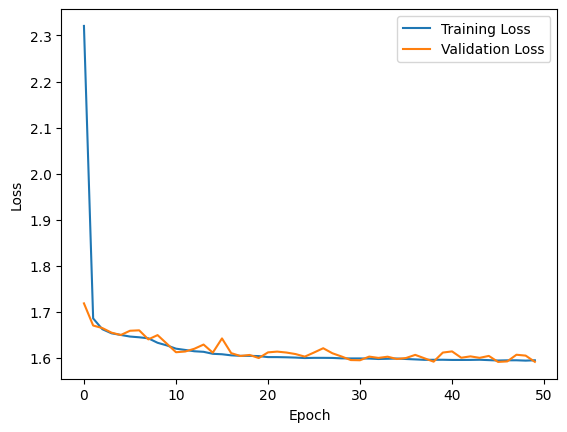

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

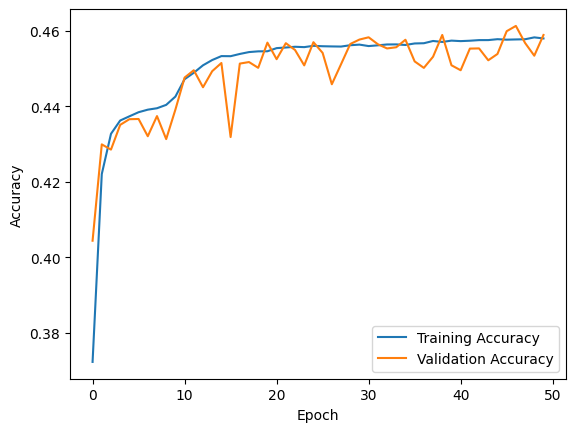

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Print model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                2368      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 12)                396       
                                                                 
Total params: 4844 (18.92 KB)
Trainable params: 4844 (18.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Make predictions
predictions = model.predict(X_test)

10515/10515 [==============================] - 15s 1ms/step


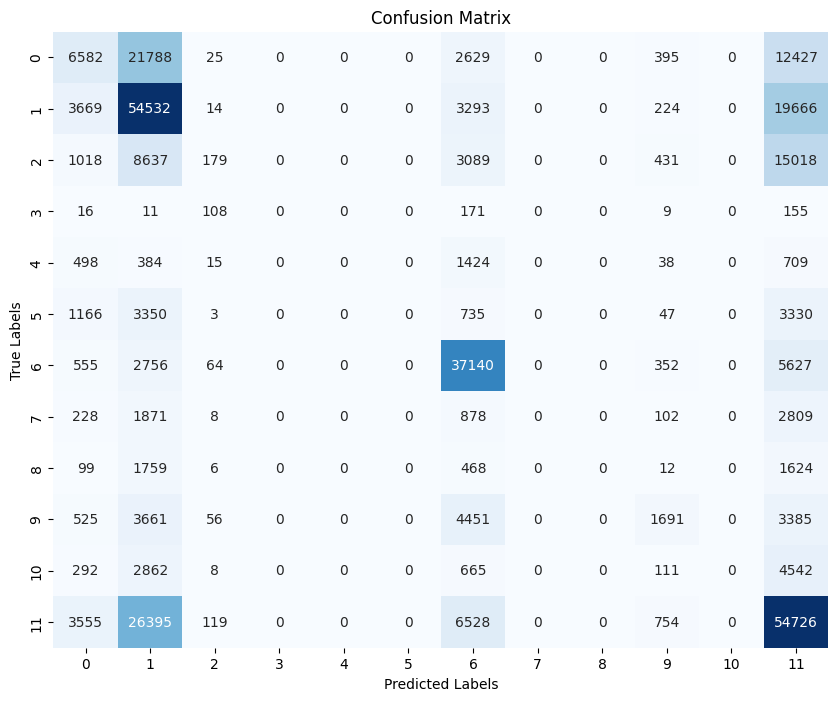

In [ ]:
# Convert predictions and true labels to categorical labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

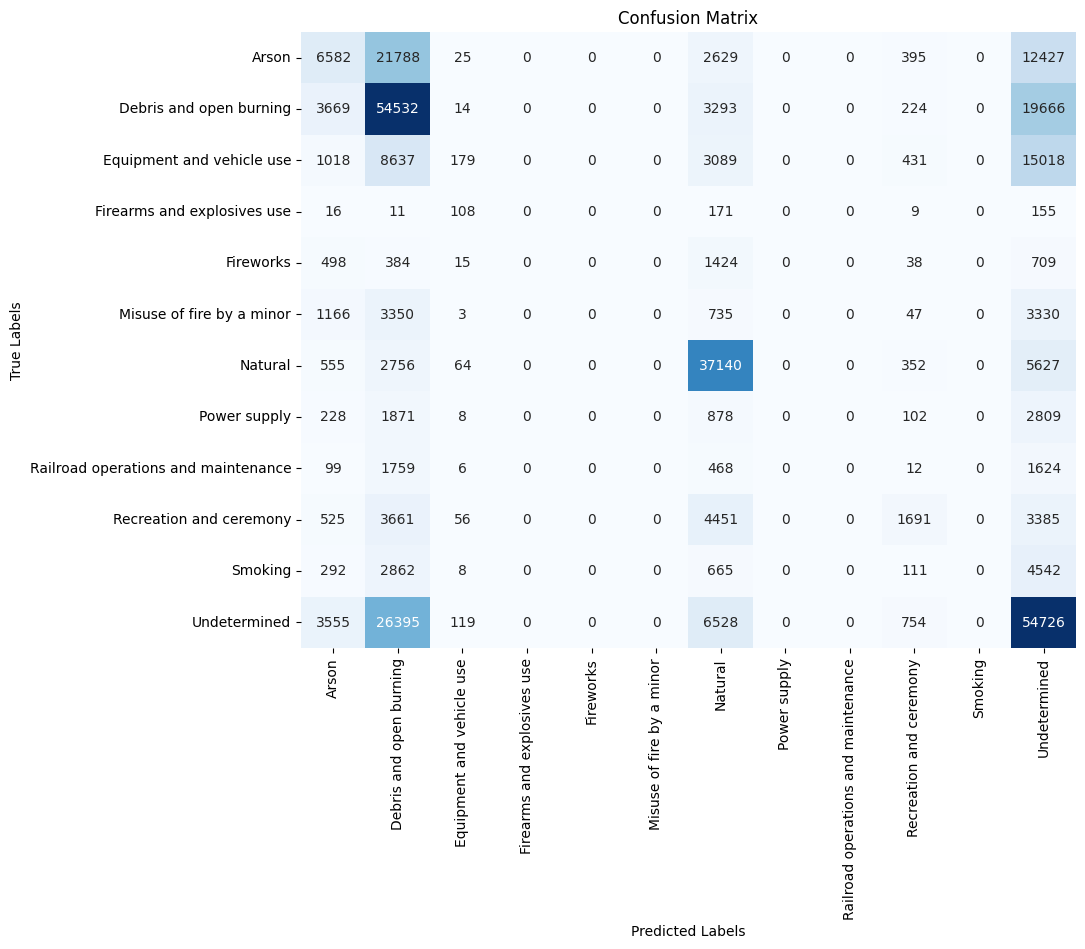

In [ ]:
# Decode class labels
decoded_labels = encoder.inverse_transform(range(len(encoder.classes_)))

# Plot confusion matrix with category labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=decoded_labels, yticklabels=decoded_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

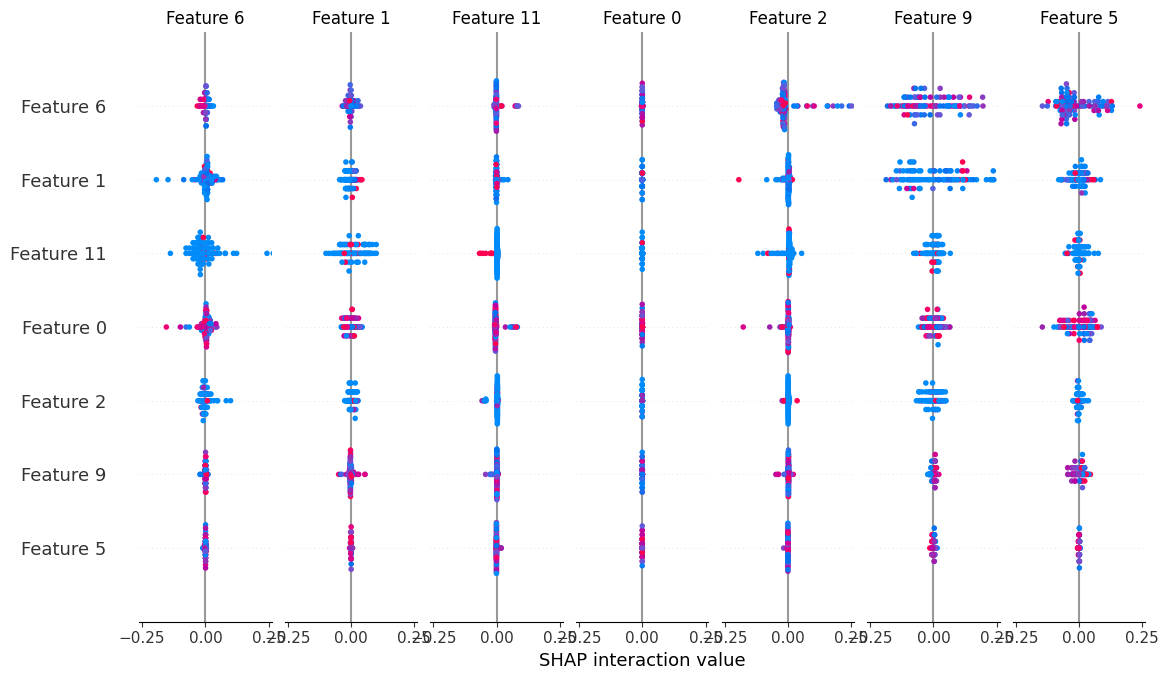

In [ ]:


# Reduce background dataset size
background_subset = shap.sample(X_train, 100)  # Adjust the sample size as needed

# Create SHAP explainer
explainer = shap.Explainer(model, background_subset)

# Reduce the number of samples for explanation
shap_values = explainer(X_test[:100])  # Adjust the sample size as needed

# Convert feature names to a list of strings
feature_names = [f'Feature {i}' for i in range(X_test[:100].shape[1])]

# Visualize SHAP values or perform analysis
shap.summary_plot(shap_values, features=X_test[:100], feature_names=np.array(feature_names))

##** Grouping data - Dataset 2**

In [6]:
model_data2 = model_data_nn.drop(model_data_nn.filter(regex='^NWCG_REPORTING_AGENCY|^OWNER_DESCR').columns, axis=1)

In [7]:
model_data2.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE'],
      dtype='object')

In [8]:
model_data2['NWCG_GENERAL_CAUSE'] = model_data2['NWCG_GENERAL_CAUSE'].replace({'Railroad operations and maintenance': 'Infrastructure-related causes',
                                                                     'Power supply': 'Infrastructure-related causes',
                                                                     'Equipment and vehicle use': 'Infrastructure-related causes',
                                                                     'Smoking': 'Erratic',
                                                                     'Misuse of fire by a minor': 'Erratic'})

model_data2 = model_data2[model_data2['NWCG_GENERAL_CAUSE'] != 'Undetermined']

In [9]:
model_data2['NWCG_GENERAL_CAUSE'].value_counts()

Debris and open burning          405877
Natural                          231547
Arson                            219102
Infrastructure-related causes    190808
Erratic                           85558
Recreation and ceremony           69984
Fireworks                         15376
Firearms and explosives use        2423
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [19]:
# Separate features and target variable
X2 = model_data2.drop('NWCG_GENERAL_CAUSE', axis=1)
y2 = model_data2['NWCG_GENERAL_CAUSE']

# convert to numpy arrays
X2 = np.array(X2)

# work with labels
# encode class values as integers
encoder2 = LabelEncoder()
encoder2.fit(y2)
encoded_y2 = encoder2.transform(y2)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y2 = to_categorical(encoded_y2)


In [21]:
# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, dummy_y2, test_size=0.2, random_state=42)

# Perform oversampling on the training data
#oversampler2 = RandomOverSampler()
#X2_train_resampled, y2_train_resampled = oversampler2.fit_resample(X2_train, y2_train)

# Standardize features (if needed)
scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

# Build the neural network model
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(X2_train.shape[1],))) #,kernel_regularizer=l2(0.01)))  # Add L2 regularization to the first layer
#model2.add(Dropout(0.5))  # Add Dropout layer with dropout rate of 0.5
model2.add(Dense(128, activation='relu'))  # Example: Add a layer with 128 nodes
model2.add(Dense(64, activation='relu'))   # Example: Add another layer with 64 nodes
model2.add(Dense(32, activation='relu')) #, kernel_regularizer=l2(0.01)))  # Add L2 regularization to the second layer
#model2.add(Dropout(0.5))  # Add Dropout layer with dropout rate of 0.5
model2.add(Dense(8, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping2 = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

# Train the model
history2 = model2.fit(X2_train, y2_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping2])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
27466/27466 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.4917 - loss: 1.3527 - val_accuracy: 0.5240 - val_loss: 1.2643
Epoch 2/50
27466/27466 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.5302 - loss: 1.2504 - val_accuracy: 0.5363 - val_loss: 1.2294
Epoch 3/50
27466/27466 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.5403 - loss: 1.2242 - val_accuracy: 0.5417 - val_loss: 1.2170
Epoch 4/50
27466/27466 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.5469 - loss: 1.2086 - val_accuracy: 0.5488 - val_loss: 1.2021
Epoch 5/50
27466/27466 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.5494 - loss: 1.1998 - val_accuracy: 0.5528 - val_loss: 1.1938
Epoch 6/50
27466/27466 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.5532 - loss: 1.1918 - val_accuracy: 0.5549 - val_loss: 1.1899
Epoch 7/50
27466/27466 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.5545 - loss: 1.1857 - val_accuracy: 0.5547 - val_loss: 1.1862
Epoch 8/50
27466/27466 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 

In [23]:
# Evaluate the model
loss, accuracy = model2.evaluate(X2_test, y2_test)

print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')

7630/7630 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5693 - loss: 1.1524
Test Accuracy: 0.5698896050453186
Test Loss: 1.152807593345642


In [24]:
# Make predictions
predictions2 = model2.predict(X2_test)

7630/7630 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


In [25]:
# Convert predictions and true labels to categorical labels
predicted_labels2 = np.argmax(predictions2, axis=1)
true_labels2 = np.argmax(y2_test, axis=1)

# Calculate confusion matrix
conf_matrix2 = confusion_matrix(true_labels2, predicted_labels2)

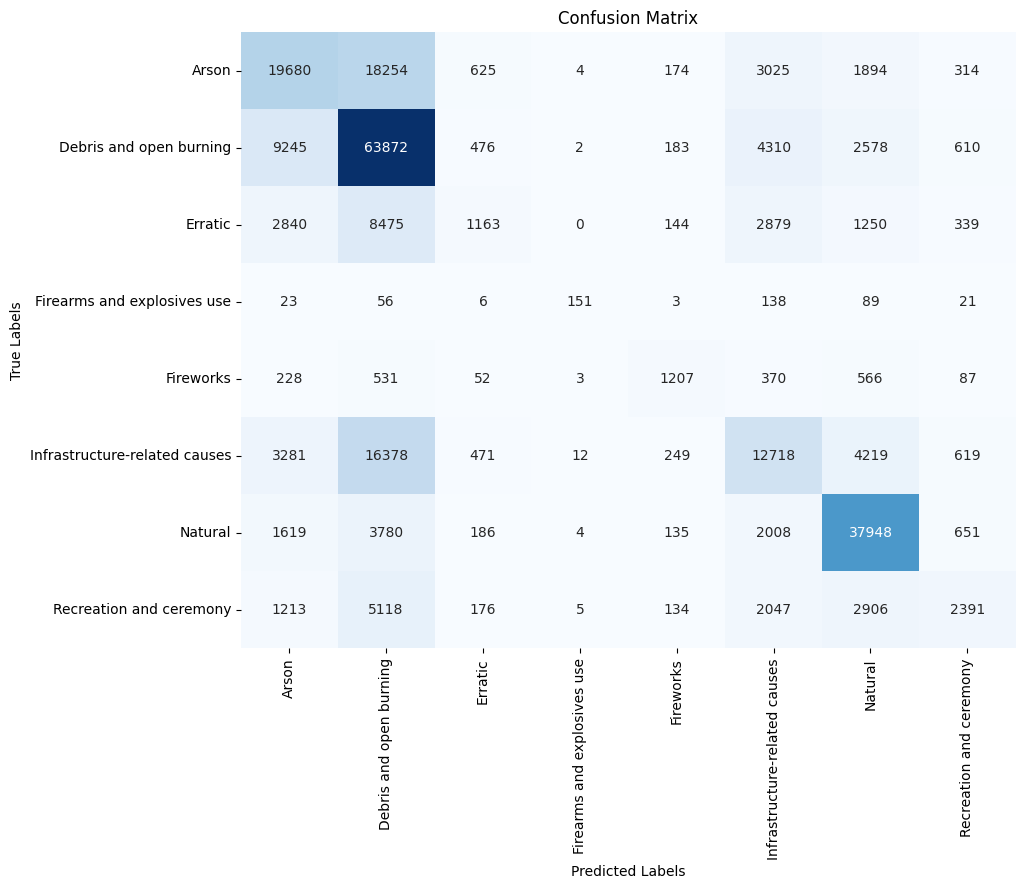

In [28]:
# Decode class labels
decoded_labels2 = encoder2.inverse_transform(range(len(encoder2.classes_)))

# Plot confusion matrix with category labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=decoded_labels2, yticklabels=decoded_labels2)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()